For my project, I will use the Bike-Sharing Data set from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

This data set includes information about a particular day including weather data and the type of day (day of week, holiday or workday, etc). I will use these features to try to predict the number of bikes taken out for a given hour. 

Here's an explanation of the variables included in this data set:

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

It was pretty straightforward to build a model on this data, as it did not have any missing values, and the categorical variables were already converted to numeric variables.

In [1]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import scipy.stats as stats

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.cross_validation import cross_val_score

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
bikeDailyData = pd.read_csv("../data/Bike-Sharing-Dataset (1)/day.csv")
bikeHourlyData = pd.read_csv("../data/Bike-Sharing-Dataset (1)/hour.csv")

In [3]:
bikeDailyData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
bikeHourlyData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
#drop instant column since it doesn't add anything new
bikeDailyData = bikeDailyData.drop(["instant"], axis=1)
bikeHourlyData = bikeHourlyData.drop(["instant"], axis=1)

In [6]:
print("Shape of Daily: ", bikeDailyData.shape, "Shape of Hourly: ", bikeHourlyData.shape)
print(bikeDailyData.dtypes)
print(bikeHourlyData.dtypes)

Shape of Daily:  (731, 15) Shape of Hourly:  (17379, 16)
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [7]:
#basic summary statistics about the number of bikes rented per day
print("DAILY")
print("Count mean: ", bikeDailyData.cnt.mean())
print("Count median: ", bikeDailyData.cnt.median())
print("Count standard deviations: ", bikeDailyData.cnt.std())

print("\nCasual mean: ", bikeDailyData.casual.mean())
print("Casual median: ", bikeDailyData.casual.median())
print("Casual standard deviations: ", bikeDailyData.casual.std())

print("\nRegistered mean: ", bikeDailyData.registered.mean())
print("Registered median: ", bikeDailyData.registered.median())
print("Registered standard deviations: ", bikeDailyData.registered.std())

print("\nHOURLY")
print("Count mean: ", bikeHourlyData.cnt.mean())
print("Count median: ", bikeHourlyData.cnt.median())
print("Count standard deviations: ", bikeHourlyData.cnt.std())

print("\nCasual mean: ", bikeHourlyData.casual.mean())
print("Casual median: ", bikeHourlyData.casual.median())
print("Casual standard deviations: ", bikeHourlyData.casual.std())

print("\nRegistered mean: ", bikeHourlyData.registered.mean())
print("Registered median: ", bikeHourlyData.registered.median())
print("Registered standard deviations: ", bikeHourlyData.registered.std())

DAILY
Count mean:  4504.3488372093025
Count median:  4548.0
Count standard deviations:  1937.2114516187678

Casual mean:  848.1764705882352
Casual median:  713.0
Casual standard deviations:  686.6224882846549

Registered mean:  3656.172366621067
Registered median:  3662.0
Registered standard deviations:  1560.2563770194527

HOURLY
Count mean:  189.46308763450142
Count median:  142.0
Count standard deviations:  181.38759909186527

Casual mean:  35.67621842453536
Casual median:  17.0
Casual standard deviations:  49.305030387053186

Registered mean:  153.78686920996606
Registered median:  115.0
Registered standard deviations:  151.35728591258317


In [8]:
#summary statistics by season
seasonDailyGroups = bikeDailyData.groupby("season")
seasonDailyGroups.cnt.agg([np.mean, np.median, np.size, np.std])

,mean,median,size,std
season,,,,
1,2604.132597,2209.0,181,1399.942119
2,4992.331522,4941.5,184,1695.977235
3,5644.303191,5353.5,188,1459.800381
4,4728.162921,4634.5,178,1699.615261


In [9]:
seasonHourlyGroups = bikeHourlyData.groupby("season")
seasonHourlyGroups.cnt.agg([np.mean, np.median, np.size, np.std])

,mean,median,size,std
season,,,,
1,111.114569,76.0,4242,119.224010
2,208.344069,165.0,4409,188.362473
3,236.016237,199.0,4496,197.711630
4,198.868856,155.5,4232,182.967972


Weather condition, humidity, and windspeed are negatively correlated with the number of bikes. Temperature and perceived tempature are postitively correlated.

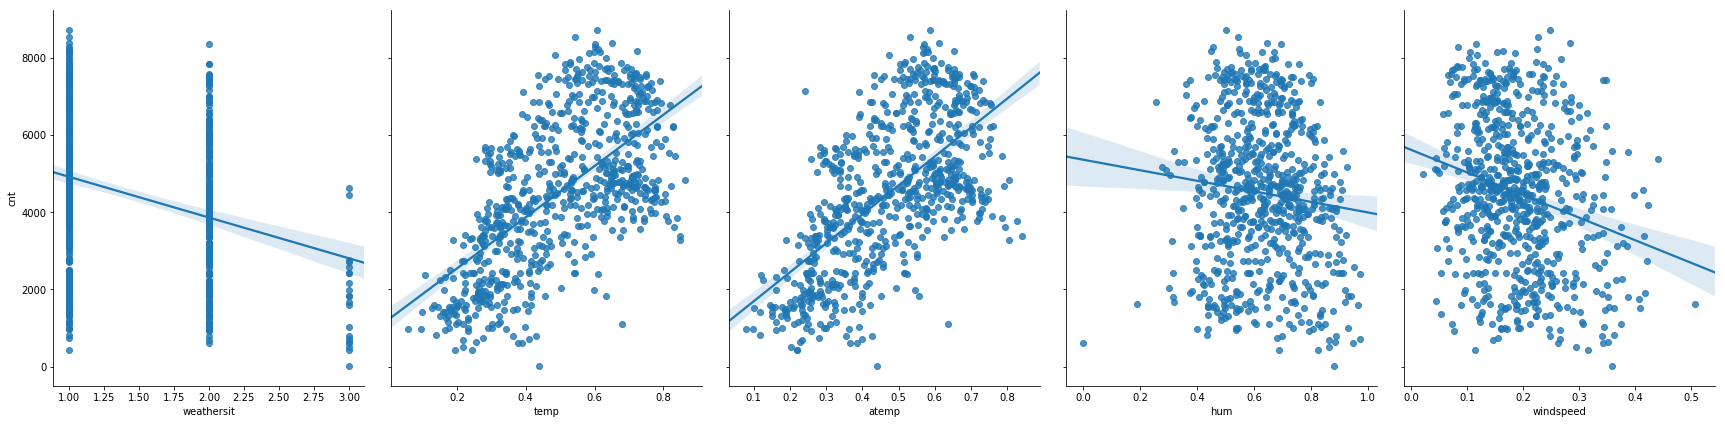

In [10]:
#visualize weather vs. # of bikes
sns.pairplot(bikeDailyData,x_vars = ["weathersit", "temp", "atemp", "hum","windspeed"],y_vars = ["cnt"], size = 6, aspect = 0.8, kind = "reg")

Below are the graphs comparing the type of day to the number of bikes used. More bikes are used in the warmer seasons/ months. More bikes are used on non-holidays and workdays. The most bikes are used on the weekends. 

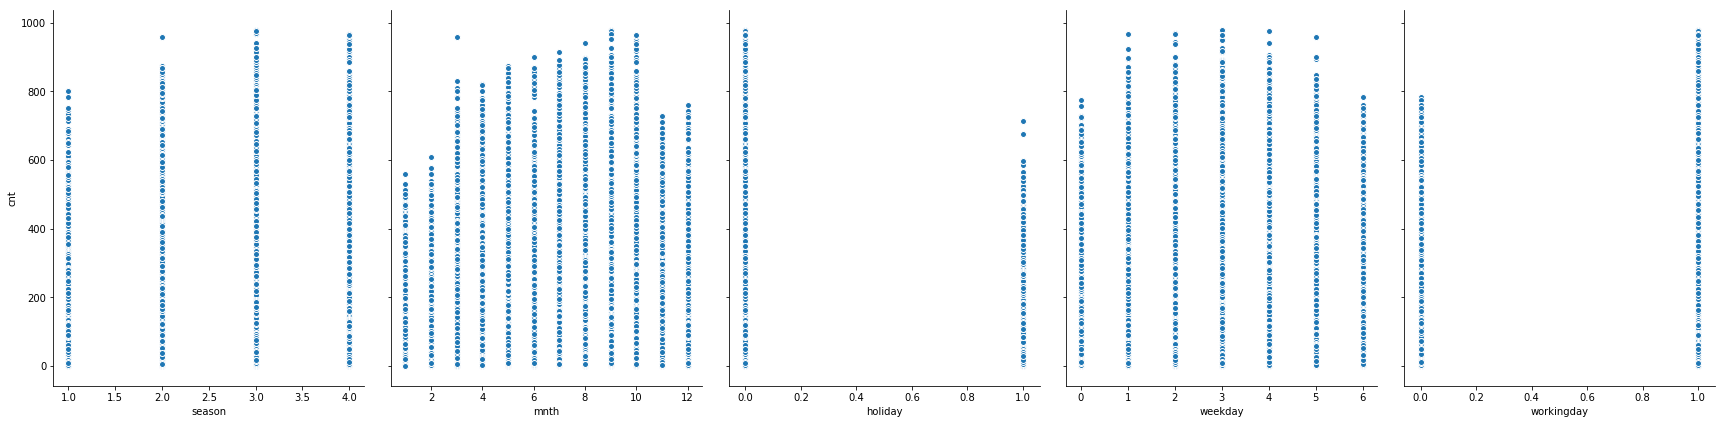

In [11]:
#visualize date variables vs # bikes
sns.pairplot(bikeHourlyData,x_vars = ["season", "mnth", "holiday", "weekday","workingday"],y_vars = ["cnt"], size = 6, aspect = 0.8)

In [12]:
bikeDailyCorrelations = bikeDailyData.corr()
bikeDailyCorrelations

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


There is a very strong negative correlation between casual and workingday (casual riders use bikes mostly on the weekend) and positive correlations between number of bikes and season/ temp. Weather conditions are fairly negatively corralted with number of bikes ( worse weather --> fewer bikes).

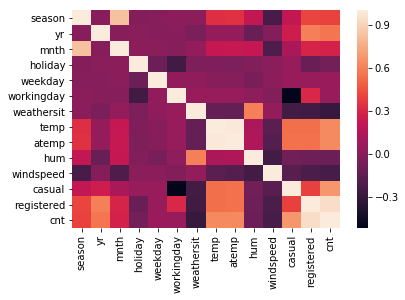

In [13]:
sns.heatmap(bikeDailyCorrelations)

In [14]:
bikeHourlyCorrelations = bikeHourlyData.corr()
bikeHourlyCorrelations

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929


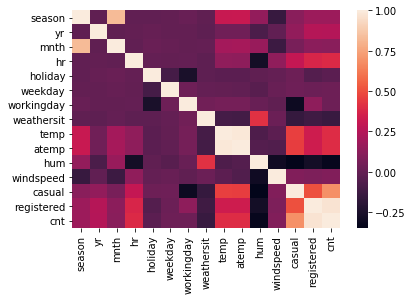

In [15]:
sns.heatmap(bikeHourlyCorrelations)

In [16]:
yrGroups = bikeDailyData.groupby("yr")
yrRides = yrGroups["cnt"].agg(np.mean)

seasonGroups = bikeDailyData.groupby("season")
seasonRides = seasonGroups["cnt"].agg(np.mean)

weekdayGroups = bikeDailyData.groupby("weekday")
weekdayRides = weekdayGroups["cnt"].agg(np.mean)

hourlyGroups = bikeHourlyData.groupby("hr")
hrlyRides = hourlyGroups["cnt"].agg(np.mean)

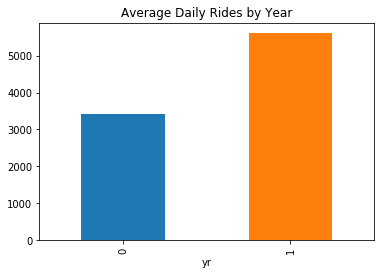

In [17]:
yrRides.plot(kind="bar", title="Average Daily Rides by Year")

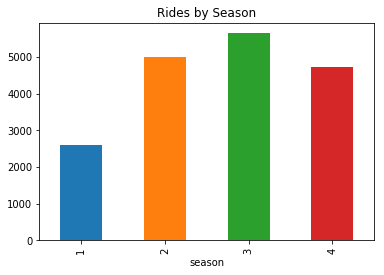

In [18]:
seasonRides.plot(kind="bar",title = "Rides by Season")

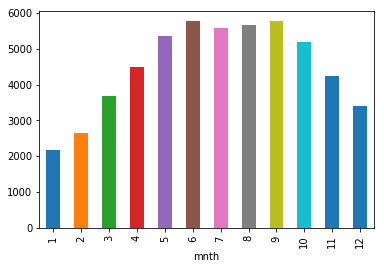

In [19]:
monthGroups = bikeDailyData.groupby("mnth")
monthRides = monthGroups["cnt"].agg(np.mean)
monthRides.plot(kind="bar")

(3000, 4924.802884615385)

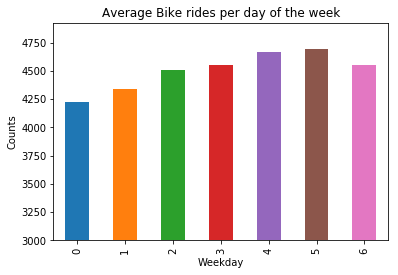

In [20]:
weekdayRides.plot(kind="bar",title = "Average Bike rides per day of the week")
sns.mpl.pyplot.ylabel("Counts")
sns.mpl.pyplot.xlabel("Weekday")
plt.ylim(3000)

Text(0.5,0,'Weekday')

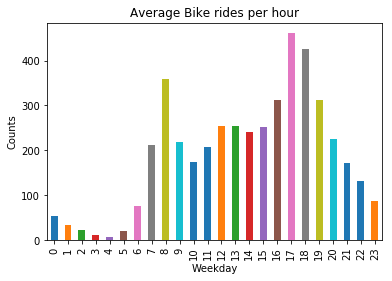

In [21]:
hrlyRides.plot(kind="bar",title = "Average Bike rides per hour")
sns.mpl.pyplot.ylabel("Counts")
sns.mpl.pyplot.xlabel("Weekday")

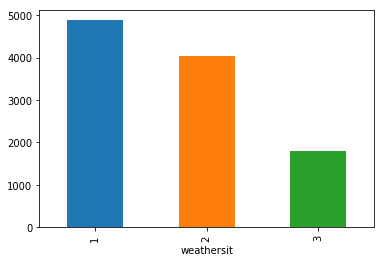

In [22]:
weatherGroups = bikeDailyData.groupby("weathersit")
weatherRides = weatherGroups["cnt"].agg(np.mean)
weatherRides.plot(kind="bar")

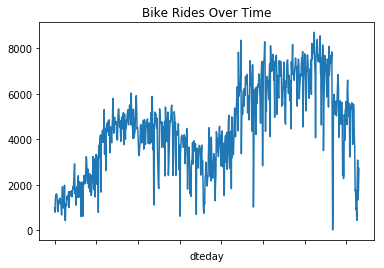

In [25]:
newSeries = pd.Series(bikeDailyData["cnt"].values, index = bikeDailyData["dteday"])
newSeries.head()
newSeries.plot(title= "Bike Rides Over Time")


**1st Model: Linear Regression with Two Variables**


Hour and temperature are the most highly correlated with # of bikes

In [27]:
features_1 = ["hr", "temp"]
X = bikeHourlyData[features_1]
y = bikeHourlyData[["cnt"]]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .2, random_state = 1)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

linReg = LinearRegression()
linReg.fit(Xtrain, ytrain)

print("y-intercept: ", linReg.intercept_)
print("coefficients: ", linReg.coef_)

y_predict_train = linReg.predict(Xtrain)
print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(ytrain, y_predict_train)))

y_predict_test = linReg.predict(Xtest)
print("Testing RMSE: ", np.sqrt(metrics.mean_squared_error(ytest, y_predict_test)))

print("R^2: ", metrics.r2_score(ytest, y_predict_test))


(13903, 2) (3476, 2) (13903, 1) (3476, 1)
y-intercept:  [-81.40213668]
coefficients:  [[  8.97216035 335.88592148]]
Training RMSE:  153.96198495451418
Testing RMSE:  153.4060994948957
R^2:  0.2946019550178256


In [28]:
mean_squared_errors = np.abs(cross_val_score(linReg, X, y, cv=50, scoring='neg_mean_squared_error'))
root_mean_squared_errors = list(map(np.sqrt,mean_squared_errors))
print("50-fold mean RMSE: ", np.mean(root_mean_squared_errors))

50-fold mean RMSE:  148.5369070705018


In [235]:
bikeHourlyData.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

**2nd Model: Linear Regression with All Variables**

In [29]:
allFeatures = bikeHourlyData.columns.tolist()[1:10] + bikeHourlyData.columns.tolist()[11:13]
Xall = bikeHourlyData[allFeatures]
yall = bikeHourlyData.cnt
Xalltrain, Xalltest, yalltrain, yalltest = train_test_split(Xall, yall, test_size = .2, random_state = 1)
print(Xalltrain.shape, Xalltest.shape, yalltrain.shape, yalltest.shape)

linRegall = LinearRegression()
linRegall.fit(Xalltrain, yalltrain)

print("y-intercept: ", linRegall.intercept_)
feature_coef = (list(zip(allFeatures, linRegall.coef_)))
print("Coefficients: ")
for x in feature_coef: print(x)

yall_predict_test = linRegall.predict(Xalltest)
print("Testing RMSE: ", np.sqrt(metrics.mean_squared_error(yalltest, yall_predict_test)))

print("R^2: ", metrics.r2_score(yalltest, yall_predict_test))

(13903, 11) (3476, 11) (13903,) (3476,)
y-intercept:  -11.515035713187217
Coefficients: 
('season', 19.920078948821256)
('yr', 80.30587655056655)
('mnth', 0.09543746227583938)
('hr', 7.61350280633493)
('holiday', -26.552676243409778)
('weekday', 1.6591573857699948)
('workingday', 4.469026929921095)
('weathersit', -4.16329853168087)
('temp', 282.21149819831277)
('hum', -198.00375173085152)
('windspeed', 23.851053150605455)
Testing RMSE:  141.65530165111016
R^2:  0.39852904131877376


In [33]:
mean_squared_errors = np.abs(cross_val_score(linReg, Xall, yall, cv=50, scoring='neg_mean_squared_error'))
root_mean_squared_errors = list(map(np.sqrt,mean_squared_errors))
print("50-fold mean RMSE: ", np.mean(root_mean_squared_errors))

50-fold mean RMSE:  137.43196671785293


**3rd Model: Linear Regression with All Variables, ^2 terms included**

Since the number of bikes has a non-linear relationship with certain variables (hr, season, month, weekday) I will now look at a linear regression with ^2 terms included. 

In [34]:
poly_fit_2 = PolynomialFeatures(degree = 2, interaction_only=False)
fitted_degree2_features = poly_fit_2.fit_transform(bikeHourlyData[allFeatures])

In [35]:
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(fitted_degree2_features, yall, test_size = 0.2, random_state = 1)

linReg2 = LinearRegression()
linReg2.fit(Xtrain2, ytrain2)

y_predict2_train = linReg2.predict(Xtrain2)

y_predict2_test = linReg2.predict(Xtest2)


print("Testing RMSE: ", np.sqrt(metrics.mean_squared_error(ytest2, y_predict2_test)))
print("R^2: ", metrics.r2_score(ytest2, y_predict2_test))

Testing RMSE:  120.17405462100022
R^2:  0.5671171054306521


In [36]:
mean_squared_errors = np.abs(cross_val_score(linReg2, fitted_degree2_features, yall, cv=50, scoring='neg_mean_squared_error'))
root_mean_squared_errors = list(map(np.sqrt,mean_squared_errors))
print("50-fold mean RMSE: ", np.mean(root_mean_squared_errors))

50-fold mean RMSE:  118.9206333705593


**4th Model: Decision Tree**

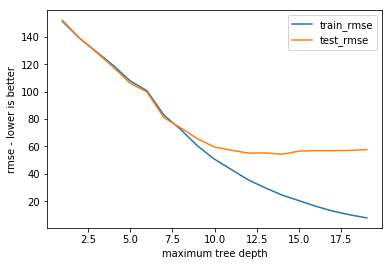

In [37]:
#determine the depth with the minimum test rmse
train_rmse,test_rmse = [],[]
for depth in range(1,20):
    dt = DecisionTreeRegressor(max_depth=depth)
    X_train,X_test,y_train,y_test = train_test_split(Xall,yall,test_size=0.2,
                                                 random_state=1)
    dt.fit(X_train,y_train)
    train_rmse.append(np.sqrt(mean_squared_error(y_train,
                                                 dt.predict(X_train))))
    test_rmse.append(np.sqrt(mean_squared_error(y_test,
                                                dt.predict(X_test))))

sns.mpl.pyplot.plot(range(1,20),train_rmse,label='train_rmse')
sns.mpl.pyplot.plot(range(1,20),test_rmse,label='test_rmse')
sns.mpl.pyplot.xlabel("maximum tree depth")
sns.mpl.pyplot.ylabel("rmse - lower is better")
sns.mpl.pyplot.legend()  

In [38]:
#build the tree with depth 13 that minimuzes test rmse
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(Xall, yall, test_size = 0.2, random_state = 1)
decision_tree = DecisionTreeRegressor(max_depth=13)
decision_tree.fit(Xtrain3,ytrain3)
print("Decision Tree RMSE:",np.sqrt(mean_squared_error(ytest3,decision_tree.predict(Xtest3))))

Decision Tree RMSE: 54.19211737354087


Hour is has the highest feature importance, followed by temperature.

In [39]:
pd.DataFrame({'feature': allFeatures, 'importance': decision_tree.feature_importances_})

,feature,importance
0,season,0.023283
1,yr,0.081115
2,mnth,0.014526
3,hr,0.619037
4,holiday,0.003242
5,weekday,0.010246
6,workingday,0.066944
7,weathersit,0.019458
8,temp,0.132575
9,hum,0.024006


In [40]:
#with cross validation
mean_squared_errors = np.abs(cross_val_score(decision_tree, Xall, yall, cv=50, scoring='neg_mean_squared_error'))
root_mean_squared_errors = list(map(np.sqrt,mean_squared_errors))
print("50-fold mean RMSE: ", np.mean(root_mean_squared_errors))

50-fold mean RMSE:  63.78784939722081


**5th Model: Random Forest**

In [41]:
#to find optimal number of estimators
estimator_range = range(20, 500, 20)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, bootstrap=True, oob_score=True, random_state=1)
    rfreg.fit(Xtrain3,ytrain3)
    preds = rfreg.predict(Xtest3)
    rmse = np.sqrt(mean_squared_error(ytest3,preds))
    RMSE_scores.append(rmse)

Text(0,0.5,'RMSE (lower is better)')

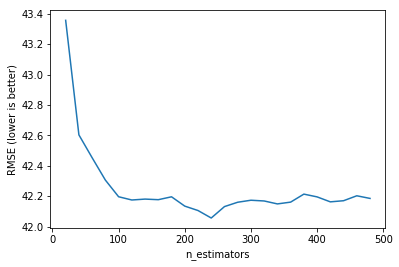

In [42]:
sns.mpl.pyplot.plot(estimator_range, RMSE_scores)
sns.mpl.pyplot.xlabel('n_estimators')
sns.mpl.pyplot.ylabel('RMSE (lower is better)')

In [43]:
# list of values to try for max_features
feature_range = range(1, len(allFeatures)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=230, bootstrap=True, 
                                  oob_score=True, max_features=feature, random_state=1)
    rfreg.fit(Xtrain3,ytrain3)
    preds = rfreg.predict(Xtest3)
    rmse = np.sqrt(mean_squared_error(ytest3,preds))
    RMSE_scores.append(rmse)

Text(0,0.5,'RMSE (lower is better)')

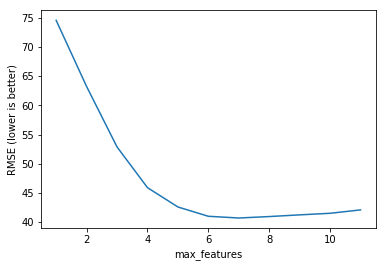

In [44]:
sns.mpl.pyplot.plot(feature_range, RMSE_scores)
sns.mpl.pyplot.xlabel('max_features')
sns.mpl.pyplot.ylabel('RMSE (lower is better)')

In [45]:
rf = RandomForestRegressor(n_estimators=230, max_features=7, max_depth = 14, bootstrap=True, oob_score=True, random_state=1)
rf.fit(Xtrain3, ytrain3)
y_pred_rf = rf.predict(Xtest3)

In [46]:
print("Random Forest RMSE:",np.sqrt(mean_squared_error(ytest3,y_pred_rf)))

Random Forest RMSE: 41.612995033916036


In [47]:
pd.DataFrame({"feature": allFeatures, "importance": rf.feature_importances_})

,feature,importance
0,season,0.027807
1,yr,0.080827
2,mnth,0.020154
3,hr,0.575599
4,holiday,0.002576
5,weekday,0.024694
6,workingday,0.059455
7,weathersit,0.017732
8,temp,0.131548
9,hum,0.048521


In [48]:
mean_squared_errors = np.abs(cross_val_score(rf, Xall, yall, cv=10, scoring='neg_mean_squared_error'))
root_mean_squared_errors = list(map(np.sqrt,mean_squared_errors))
print("10-fold mean RMSE: ", np.mean(root_mean_squared_errors))

10-fold mean RMSE:  58.51930191691319


**Summary: **

The random forest model performed the best, with an RMSE using cross-validation of 58.5. A linear regression including ^2 terms performed better than the regular linear regression. This is most likely because it captures some of the variability in the variables that are not linearly related to the count of bikes (e.g. season, month, weekday, hour). 

An additional variable that could be useful in this prediction is the amount of traffic there is for any given hour. 

One way to expand on these models would be to try to predict casual and registered counts separately. There are several differences between these two groups (casual riders ride more on the weekend, registered on the weekdays, casual riders are more sensitive to the temperature, the popular hours for bike rides differs between groups). By modeling these two counts separately, these relationships could be seen more clearly, and perhaps the models' accuracy would improve. 

